<a href="https://colab.research.google.com/github/patrickdevv/FIAP_Fase01_Desafio/blob/main/Desafio_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Pós-Tech - IA para Devs - Fase 01**

Carregar as libs para utilizar no notebook

In [1]:
# Importações
from datetime import datetime as dt

from pandas import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

**Carregar a base de dados, obtida do kaggle, e armazenada no github**

In [2]:
# Carregar Dados do GitHub
# URL do link bruto do arquivo no GitHub
url = 'https://raw.githubusercontent.com/edumarcelino/dataset/main/insurance.csv'

# Tentar carregar o DataFrame
try:
    df = pd.read_csv(url)
    print("DataFrame carregado com sucesso!")
    print(df.head())
except Exception as e:
    print(f"Erro ao carregar o DataFrame: {e}")

DataFrame carregado com sucesso!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**Verificar se existem missing values no dataset**

In [3]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print("Quantidade de Missing Values por coluna:\n \n", missing_values)

Quantidade de Missing Values por coluna:
 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Função que gera a categoria de idade**

In [4]:
# Função para categorizar idade em inglês
def age_category(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 34:
        return 'Young Adult'
    elif age <= 64:
        return 'Adult'
    else:
        return 'Senior'

**Gerar variaveis categorica e numerica**

In [5]:
# Aplicar a função ao DataFrame para gerar a variavel categorica age_category
df['age_category'] = df['age'].apply(age_category)

# Criar a variável com a quantidade de pessoas no plano
df['number_people_on_plan'] = df['children'] + 1

**Visualizando as caracteristicas descritivas**

In [6]:
# Estatísticas descritivas
desc = df.describe()

# Traduzir índices e colunas da estatistica descritiva
desc = desc.rename(index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio padrão',
    'min': 'mínimo',
    '25%': '25%',
    '50%': 'mediana (50%)',
    '75%': '75%',
    'max': 'máximo'
})

# Trazudindo as colunas
desc = desc.rename(columns={
    'age': 'idade',
    'bmi': 'imc',
    'children': 'filhos',
    'charges': 'encargos',
    'age_category': 'idade_categoria',
    'number_people_on_plan': 'pessoas_no_plano'
})

# Exibir as estatísticas descritivas traduzidas
print(desc)

                     idade          imc       filhos      encargos  \
contagem       1338.000000  1338.000000  1338.000000   1338.000000   
média            39.207025    30.663397     1.094918  13270.422265   
desvio padrão    14.049960     6.098187     1.205493  12110.011237   
mínimo           18.000000    15.960000     0.000000   1121.873900   
25%              27.000000    26.296250     0.000000   4740.287150   
mediana (50%)    39.000000    30.400000     1.000000   9382.033000   
75%              51.000000    34.693750     2.000000  16639.912515   
máximo           64.000000    53.130000     5.000000  63770.428010   

               pessoas_no_plano  
contagem            1338.000000  
média                  2.094918  
desvio padrão          1.205493  
mínimo                 1.000000  
25%                    1.000000  
mediana (50%)          2.000000  
75%                    3.000000  
máximo                 6.000000  


**Visualização grafica**

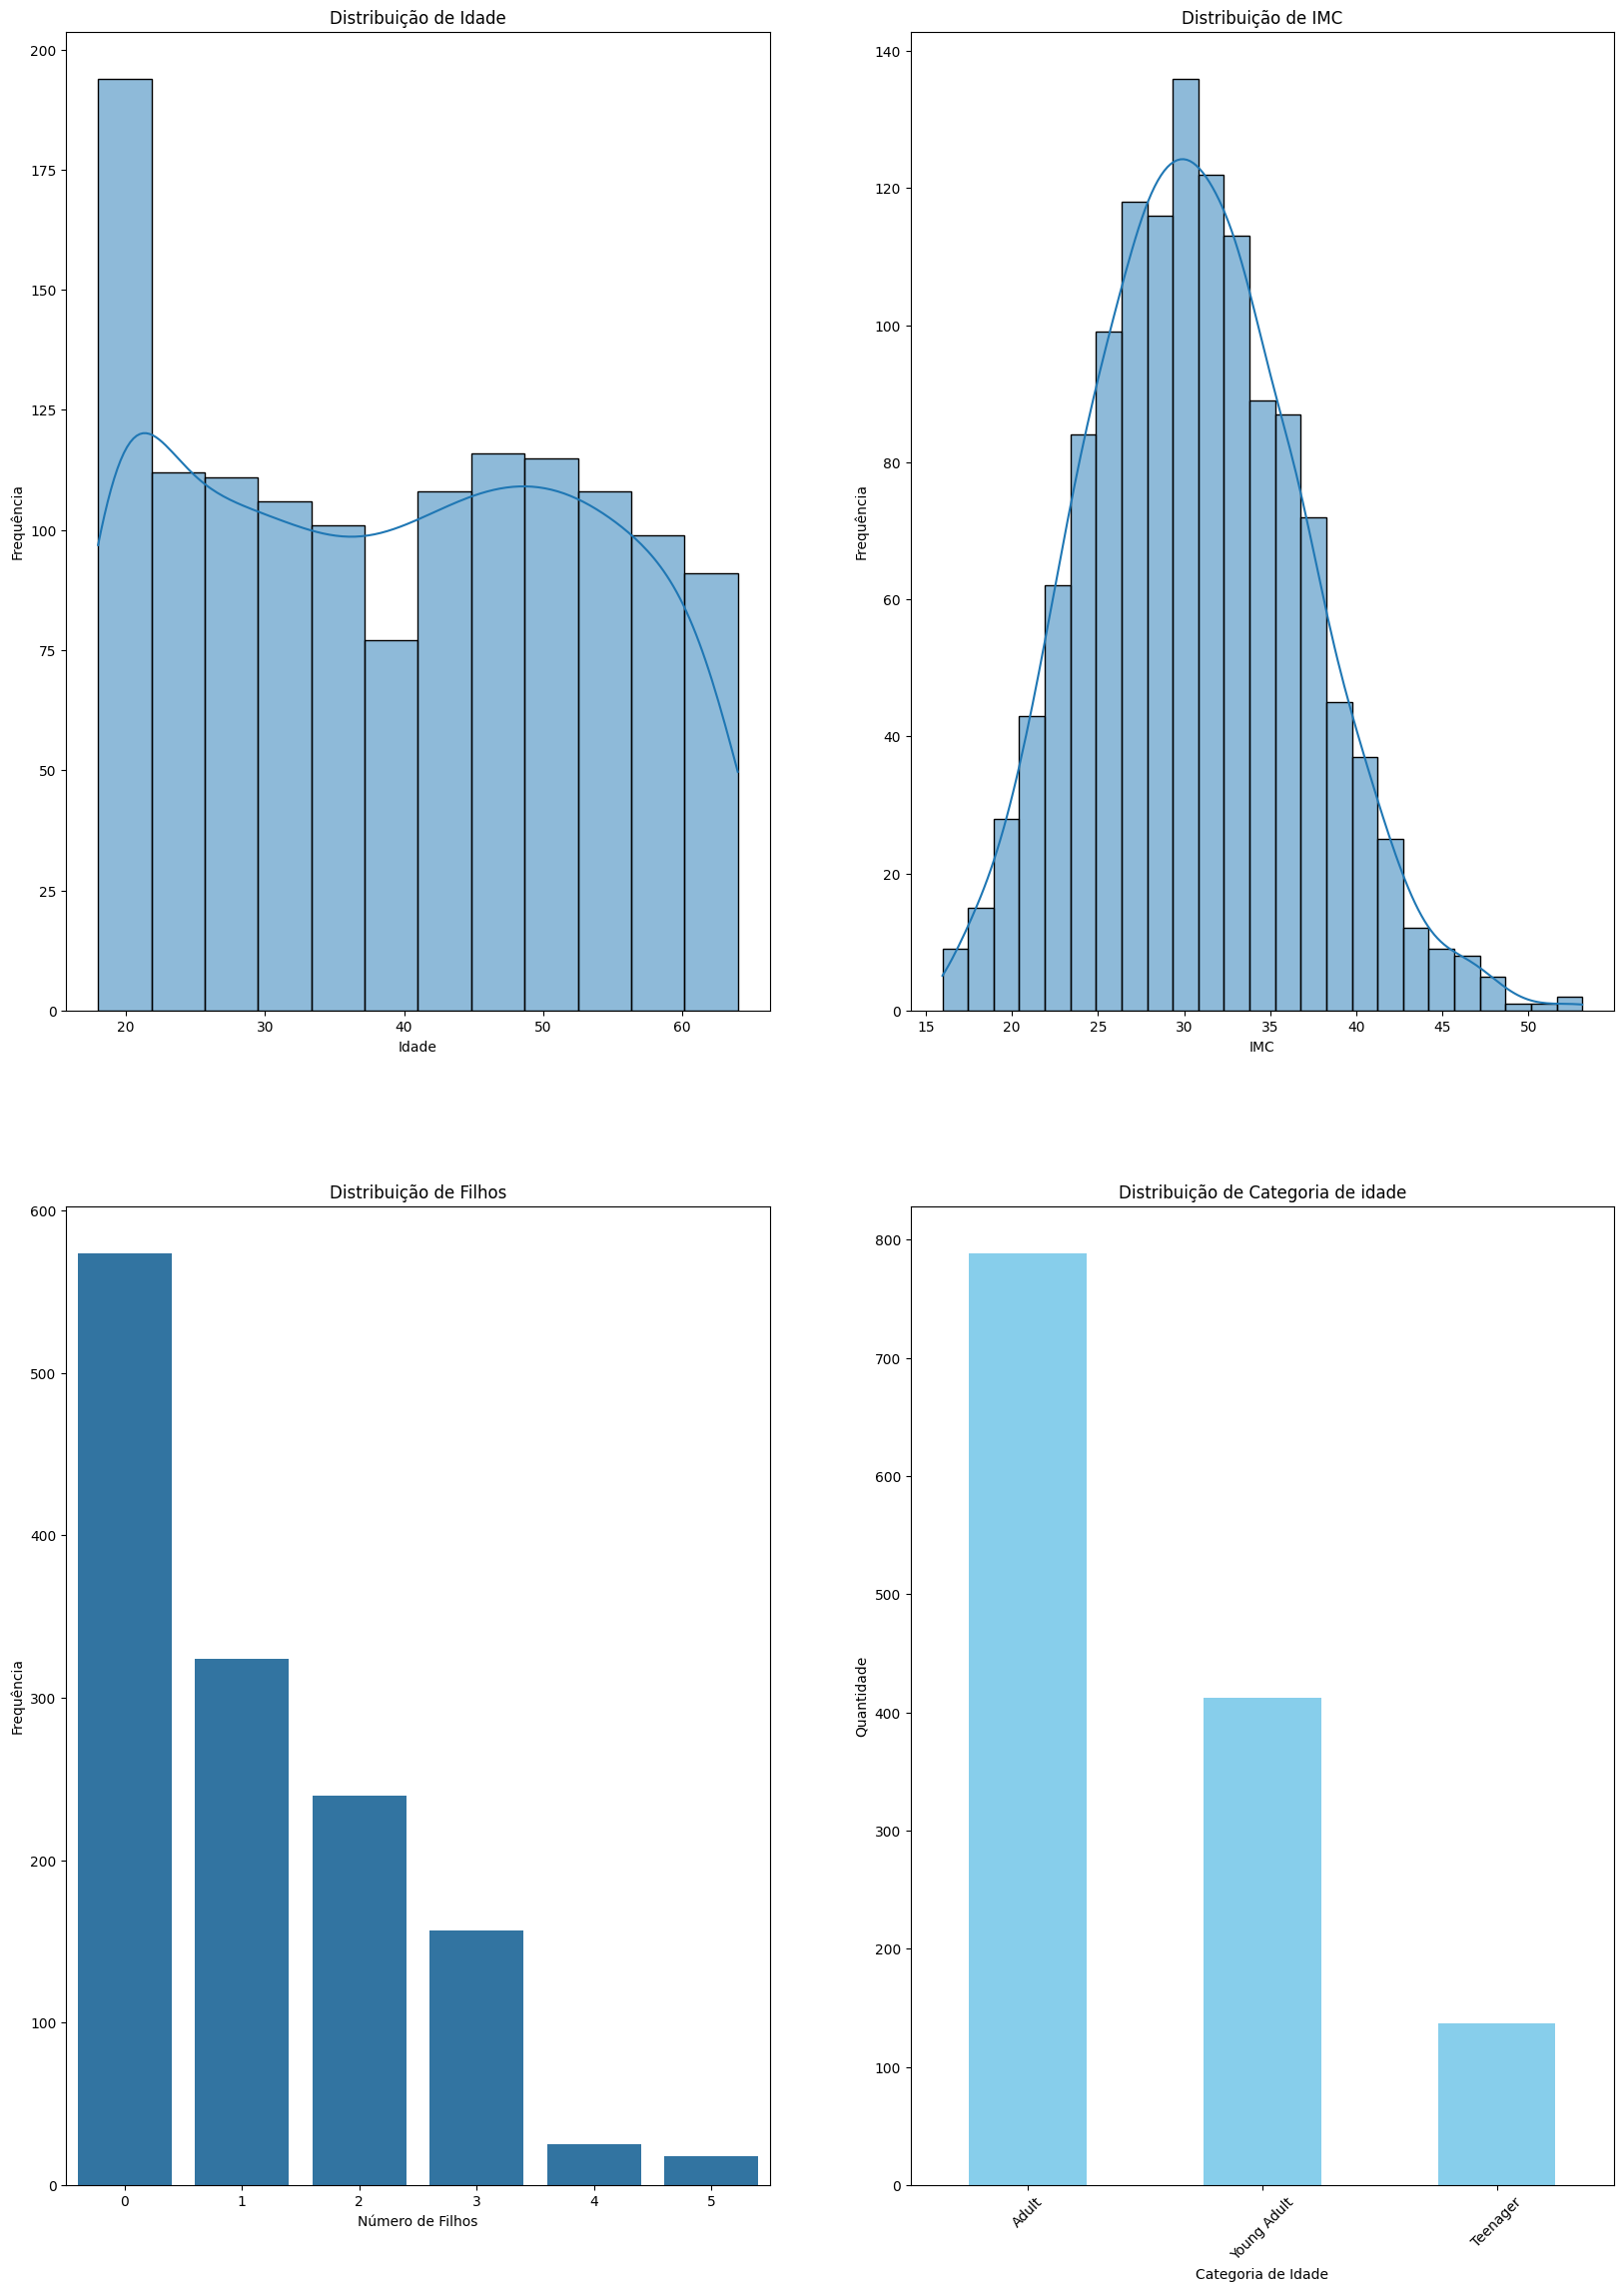

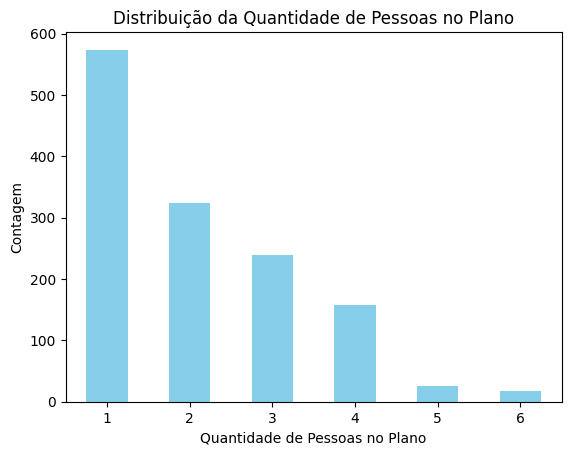

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualização das distribuições
plt.figure(figsize=(20, 28))

# Idade
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# IMC
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Filhos
plt.subplot(2, 2, 3)
sns.countplot(x='children', data=df)
plt.title('Distribuição de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Frequência')

# Encargos
plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Distribuição de Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')

# Plotar a distribuição da variável categórica
df['age_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Categoria de idade')
plt.xlabel('Categoria de Idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# Plotar a distribuição da quantidade de pessoas no plano
df['number_people_on_plan'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição da Quantidade de Pessoas no Plano')
plt.xlabel('Quantidade de Pessoas no Plano')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

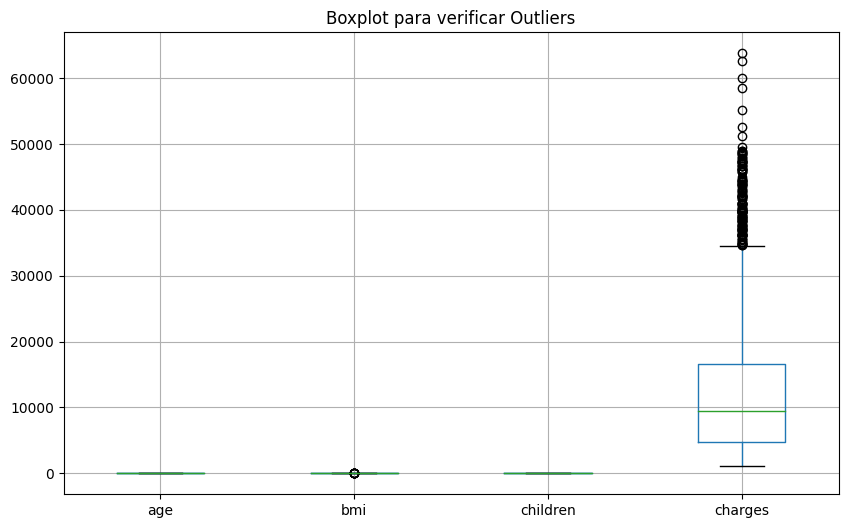

In [8]:
# Boxplot para verificar outliers
plt.figure(figsize=(10, 6))
df[['age', 'bmi', 'children', 'charges']].boxplot()
plt.title('Boxplot para verificar Outliers')
plt.show()